# Hands On with Faster-R-CNN
This notebook demonstrates a standardized pipeline for utilizing pre-trained models (faster-RCNN) and their associated weights from the Torch Hub.

## Resources
- [Torch Vision Model](https://pytorch.org/vision/stable/models.html) : List of available models and weights.
- [Torch Official Tutorial](https://pytorch.org/hub/pytorch_vision_resnet/) : Tutorial on basic pytorch.
- [Hugging Face Faster R-CNN](https://huggingface.co/blesot/Faster-R-CNN-Object-detection)- Hugging face page on Faster R-CNN.

# Summary 
## One Cell scripts for inference on Model and Inference
Experienced users may skip the explanatory sections that follows.

dog 0.9965646862983704


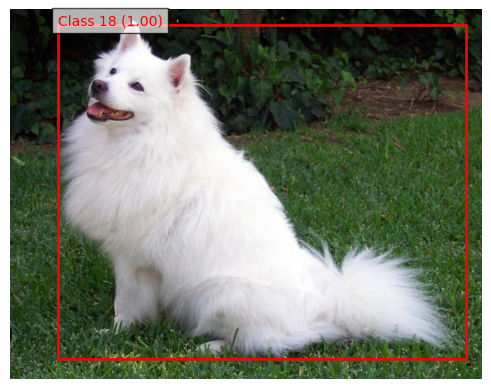

id_2_label[labels.item()] ='dog'


In [1]:
from torchvision.io.image import read_image
from PIL import Image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt
import torch
import urllib

# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

# Step 2: Load data
# Download an example image from the pytorch website
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
image = Image.open(filename)

# Step 3: Apply preprocessing transforms
preprocess = weights.transforms()
batch = [preprocess(image)]

# Step 4: Use the model and visualize the prediction
with torch.no_grad():
    prediction = model(batch)[0]

id_2_label = {idx:x for idx,x in enumerate(weights.meta["categories"])}

# Extract bounding boxes, labels, and scores
boxes = prediction['boxes']
labels = prediction['labels']
scores = prediction['scores']

# Visualize the results
plt.imshow(image)
for box, label, score in zip(boxes, labels, scores):
  if score > 0.1:
    print(id_2_label[label.item()], score.item())
    plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                      fill=False, edgecolor='red', linewidth=2))
    plt.text(box[0], box[1], f"Class {label.item()} ({score:.2f})", color='red', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7))

plt.axis('off')
plt.show()
print(f"{id_2_label[labels.item()] =}")

# Explanatory Breakdown

The PyTorch vision library provides a range of pre-trained R-CNN object detection models, as detailed in the official PyTorch documentation: 
- https://pytorch.org/vision/stable/models.html. (Please refer to the object detection section)

## 1. Model Loading: Faster R-CNN Family

The loaded model utilizes a pre-trained faster R-CNN architecture built upon a ResNet50 convolutional neural network (CNN). This model consists of the following components:
- CNN Backbone (ResNet50): A pre-trained ResNet50 model serving as the feature extractor.
- Region Proposal Network (RPN): A network responsible for generating region proposals.
- Fully-Connected Layers: Output layers producing bounding box coordinates and class labels.


In [2]:
from torchinfo import summary
# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()
summary(model)

Layer (type:depth-idx)                             Param #
FasterRCNN                                         --
├─GeneralizedRCNNTransform: 1-1                    --
├─BackboneWithFPN: 1-2                             --
│    └─IntermediateLayerGetter: 2-1                --
│    │    └─Conv2d: 3-1                            (9,408)
│    │    └─BatchNorm2d: 3-2                       (128)
│    │    └─ReLU: 3-3                              --
│    │    └─MaxPool2d: 3-4                         --
│    │    └─Sequential: 3-5                        (215,808)
│    │    └─Sequential: 3-6                        1,219,584
│    │    └─Sequential: 3-7                        7,098,368
│    │    └─Sequential: 3-8                        14,964,736
│    └─FeaturePyramidNetwork: 2-2                  --
│    │    └─ModuleList: 3-9                        985,088
│    │    └─ModuleList: 3-10                       2,361,344
│    │    └─LastLevelMaxPool: 3-11                 --
├─RegionProposalNetwork: 1-3

## 2. Data Loading

In [3]:
# Download an example image from the pytorch website
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
image = Image.open(filename)


## 3. Preprocess the image
Define a transformation pipeline (adjust based on model requirements). 
- Using preprocess defined from the weights.

In [4]:
# Step 3: Apply preprocessing transforms
preprocess = weights.transforms()
batch = [preprocess(image)]

## 4: Model Inference

In [5]:
# Step 4: Use the model and visualize the prediction
with torch.no_grad():
    prediction = model(batch)

## 5: Visualize the prediction

dog 0.9965646862983704


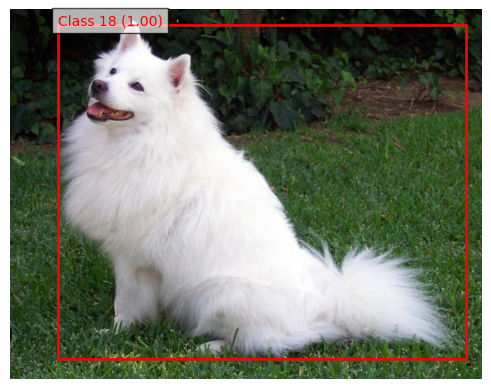

id_2_label[labels.item()] ='dog'


In [6]:
import matplotlib.pyplot as plt
# Extract bounding boxes, labels, and scores
boxes = prediction[0]['boxes']
labels = prediction[0]['labels']
scores = prediction[0]['scores']

# Visualize the results
plt.imshow(image)
for box, label, score in zip(boxes, labels, scores):
  if score > 0.1:
    print(id_2_label[label.item()], score.item())
    plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                      fill=False, edgecolor='red', linewidth=2))
    plt.text(box[0], box[1], f"Class {label.item()} ({score:.2f})", color='red', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7))

plt.axis('off')
plt.show()
print(f"{id_2_label[labels.item()] =}")